# **Task 3**

### **Importing necessary libraries**

In [1]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from prettytable import PrettyTable
import matplotlib.pyplot as plt

### **Loading of data**

In [2]:
pickle_file = 'data.pickle'
dict_pickle_data = pickle.load(open(pickle_file, 'rb'))

### **Training and test data**

In [3]:
train_data = dict_pickle_data['train']
train_data = np.array(train_data)
np.random.shuffle(train_data)
train_data = np.array_split(train_data, 15)
test_data = dict_pickle_data['test']

x_test = test_data[:, 0]
y_test = test_data[:, 1]

### **Calculating Bias and Variance**

In [4]:
final_bias = []
final_var = []
final_mse = []

for degree in range(1,11):
    predictions=[]
    for i in range(15):
        x_train_subset = train_data[i][:, 0]
        y_train_subset = train_data[i][:, 1]
        
        transformer = PolynomialFeatures(degree)
        x_train_poly = transformer.fit_transform(x_train_subset.reshape(-1, 1))

        model = LinearRegression().fit(x_train_poly, y_train_subset)

        x_test_poly = transformer.fit_transform(x_test.reshape(-1, 1))
        y_pred = model.predict(x_test_poly)
        predictions.append(y_pred)
    
    predictions = np.array(predictions)
    mean = np.mean(predictions, axis=0)
    
    bias_square = np.mean((np.mean(predictions, axis=0) - y_test) ** 2)
    
    variance = np.mean(((predictions - mean) ** 2), axis=0)
    variance = np.mean(variance)
 
    mse = np.mean((predictions - y_test) ** 2, axis=0)
    mse = (np.mean(mse))

    final_bias.append(bias_square)
    final_var.append(variance)
    final_mse.append(mse)

### **Table representation**

In [5]:
table = PrettyTable()
table.field_names = ["Degree", "Bias^2", "Variance", "MSE"]
for i in range(10):
    table.add_row([i+1, final_bias[i], final_var[i], final_mse[i]])

print(table)

+--------+--------------------+---------------------+--------------------+
| Degree |       Bias^2       |       Variance      |        MSE         |
+--------+--------------------+---------------------+--------------------+
|   1    | 2.5711094076342356 | 0.05954785135367473 | 2.630657258987912  |
|   2    |  2.53503658393094  | 0.12580986963739388 | 2.660846453568335  |
|   3    | 2.004345032923701  |  0.1484009907431215 | 2.1527460236668223 |
|   4    | 1.7576908798305173 |  0.2508381282560887 | 2.008529008086607  |
|   5    | 1.6185968587017818 |  0.5774751823148184 | 2.1960720410165986 |
|   6    | 1.6473927777318351 |  1.1015315910101653 | 2.7489243687420015 |
|   7    | 1.8104616438148113 |  2.5213689428501187 |  4.33183058666493  |
|   8    | 2.941683807179012  |  1.4712687117665986 | 4.412952518945609  |
|   9    | 6.063589460404333  |  6.3803694239267355 | 12.443958884331066 |
|   10   | 9.000907661550546  |  10.411641636149337 | 19.41254929769988  |
+--------+---------------

# **Task 4**

### **Calculating Irreducible Error**

In [203]:

final_irr_err = []
final_irr_err_rounded = []

for i in range(1, 11):
    irreducible_error = final_mse[i - 1] - final_var[i - 1] - final_bias[i - 1]
    final_irr_err.append(irreducible_error)
    final_irr_err_rounded.append(round(irreducible_error))
    
table = PrettyTable()
table.field_names = ["Degree", "Bias^2", "Variance", "MSE", "Irreducible error", "Irreducible error-rounded off"]
for i in range(10):
    table.add_row([i+1, final_bias[i], final_var[i], final_mse[i], final_irr_err[i], final_irr_err_rounded[i]])

print(table)

+--------+--------------------+---------------------+--------------------+-------------------------+-------------------------------+
| Degree |       Bias^2       |       Variance      |        MSE         |    Irreducible error    | Irreducible error-rounded off |
+--------+--------------------+---------------------+--------------------+-------------------------+-------------------------------+
|   1    | 2.571206699582909  | 0.07907299269422811 | 2.6502796922771363 |  -8.881784197001252e-16 |               0               |
|   2    | 2.533979379020787  | 0.15923339357643523 | 2.693212772597222  |  -4.440892098500626e-16 |               0               |
|   3    | 1.989466347400548  | 0.17976081360132884 | 2.169227161001877  |           0.0           |               0               |
|   4    | 1.7106423637038444 | 0.24976957330327543 | 1.960411937007119  |  -8.881784197001252e-16 |               0               |
|   5    | 1.614251373097558  |  0.3893389114434541 | 2.0035902845410

# **Task 5**

### **Plotting Bias2 - Variance Graph**

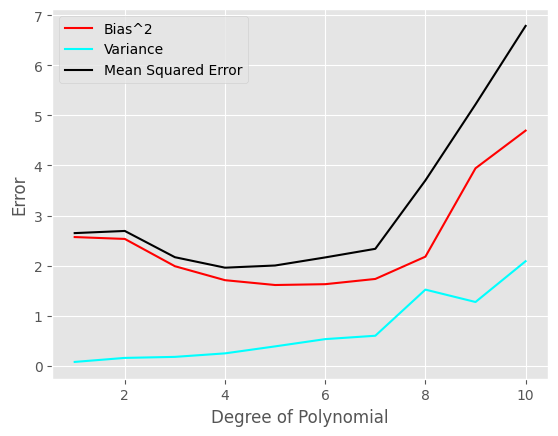

In [204]:
plt.plot(range(1,11), final_bias, label='Bias^2' , color='red')
plt.plot(range(1,11), final_var, label='Variance' , color='cyan')
plt.plot(range(1,11), final_mse, label='Mean Squared Error' , color='black')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.legend()
plt.show()

# **Task 6**

### **Importing necessary libraries**

In [205]:
import pickle
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

### **Function to split data into X and Y**

In [206]:
def get_XY(data):
    X = np.array([point[0] for point in data]).reshape(-1, 1)
    Y = np.array([point[1] for point in data]).reshape(-1, 1)
    return X, Y

### **Load Data**

In [207]:
with open("data.pickle", "rb") as dataset:
    data = pickle.load(dataset)
    train_data = data['train']
    test_data = data['test']

### **Split data into X and Y**

In [208]:
X_train, Y_train = get_XY(train_data)
X_test, Y_test = get_XY(test_data)

### **(a) Polynomial Regression without regularization**

In [209]:
poly = preprocessing.PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, Y_train)
y_pred = model.predict(X_test_poly)
mse_poly = mean_squared_error(Y_test, y_pred)
print("MSE (Polynomial Regression - No Regularization):", mse_poly)

MSE (Polynomial Regression - No Regularization): 3.476470277813317


### **(b) Regularized Regression using Ridge**

In [210]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, Y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
print("MSE (Ridge Regression with Polynomial Features):", mse_ridge)

MSE (Ridge Regression with Polynomial Features): 1.62656233148536


/home/dr/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.01198e-44): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### **(c) Regularized Regression using Lasso**

In [211]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, Y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
print("MSE (Lasso Regression with Polynomial Features):", mse_lasso)

MSE (Lasso Regression with Polynomial Features): 1.6413537629867156


/home/dr/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.627e+04, tolerance: 1.817e+01
  model = cd_fast.enet_coordinate_descent(


### **(d) Comparison and Discussion**


Comparison of MSE values:
Polynomial Regression MSE: 3.476470277813317
Ridge Regression MSE: 1.62656233148536
Lasso Regression MSE: 1.6413537629867156


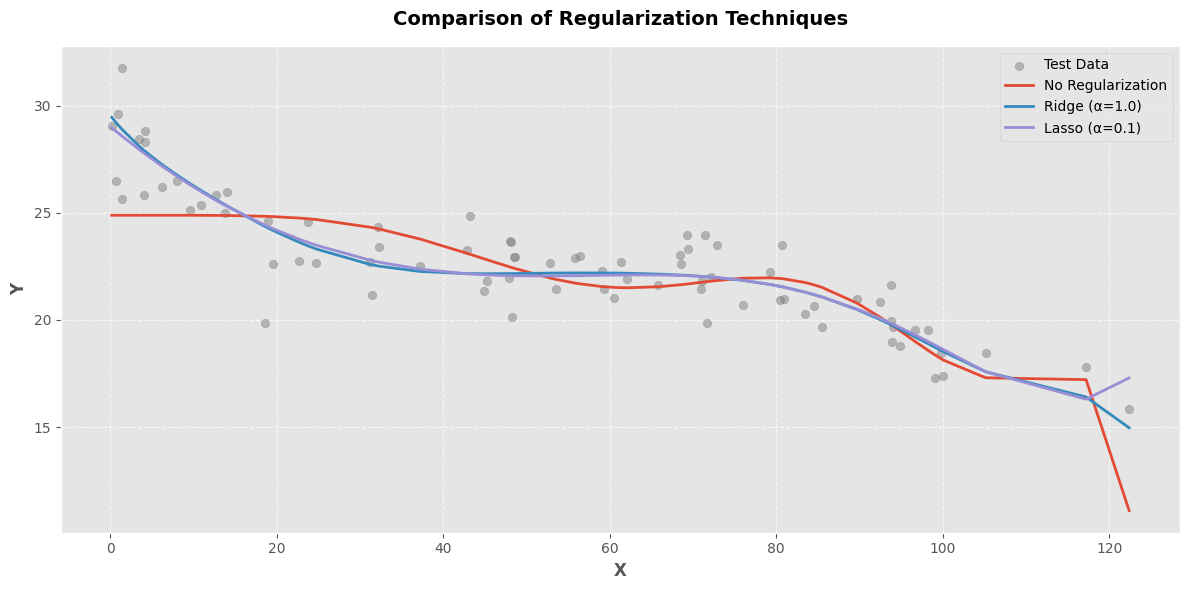

In [212]:
print("\nComparison of MSE values:")
print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Lasso Regression MSE: {mse_lasso}")

ridge_alpha = 1.0
lasso_alpha = 0.1

plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

plt.scatter(X_test, Y_test, color='gray', alpha=0.5, label='Test Data')

X_plot = np.sort(X_test, axis=0)
X_plot_poly = poly.transform(X_plot)

plt.plot(X_plot, model.predict(X_plot_poly), 
         label='No Regularization', linewidth=2)
plt.plot(X_plot, ridge_model.predict(X_plot_poly), 
         label=f'Ridge (α={ridge_alpha})', linewidth=2)
plt.plot(X_plot, lasso_model.predict(X_plot_poly), 
         label=f'Lasso (α={lasso_alpha})', linewidth=2)

plt.xlabel('X', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.title('Comparison of Regularization Techniques', 
          fontsize=14, fontweight='bold', pad=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
